# Twin-Causal-Net Example
***
The following notebook shows how to use the `twincausal` *Python* library.

#### Import the libraries and generate synthetic uplift data

In [6]:
# %pip install -e C:\Users\Mouloud\Documents\Projets\twin-causal-net\

Obtaining file:///C:/Users/Mouloud/Documents/Projets/twin-causal-net
  Running setup.py develop for twincausal
Note: you may need to restart the kernel to use updated packages.


In [1]:
import twincausal.utils.data as twindata
from twincausal.model import twin_causal
from sklearn.model_selection import train_test_split
from twincausal.utils.performance import qini_curve, qini_barplot

In [2]:
X, T, Y = twindata.generator(scenario=3, random_state=123456)  # Generate fake uplift data

In [3]:
X_train, X_test, T_train, T_test, Y_train, Y_test = train_test_split(X, T, Y, test_size=0.5, random_state=123)

#### Initialize the model

In [4]:
input_size = X.shape[1]  # Number of features, the model will handle automatically the treatment variable

In [5]:
# How to train a twin-neural model with 1-hidden layer
uplift = twin_causal(nb_features=input_size, # required parameter
                     # optional hyper-parameters for fine-tuning
                     nb_hlayers=1, nb_neurons=256, lrelu_slope=0.05, batch_size=256, shuffle=True,  
                     max_iter=100, learningRate=0.009, reg_type=1, l_reg_constant=0.001, 
                     prune=True, gpl_reg_constant=0.005, loss="uplift_loss",
                     # default parameters for reporting
                     learningCurves=True, save_model=True, verbose=False, logs=True, 
                     random_state=1234)

In [6]:
uplift  # Print model architecture

twin_causal(
  (fc_layer): LinearProximal(in_features=101, out_features=256, bias=True)
  (fc_output): LinearProximal(in_features=256, out_features=1, bias=True)
)

#### Fitting the model

input_size               101         
nb_hlayers               1           
nb_neurons               256         
lrelu_slope              0.050000    
batch_size               256         
shuffle                  True        
epochs                   100         
learningRate             0.009000    
reg_type                 1           
l_reg_constant           0.001000    
prune                    True        
gpl_reg_constant         0.005000    
seed                     1234        
learningCurves           True        
save_model               True        
verbose                  False       
logs                     True        
active_nb_nodes          256         
Percent: [####################] 99.0% 99999999999%  

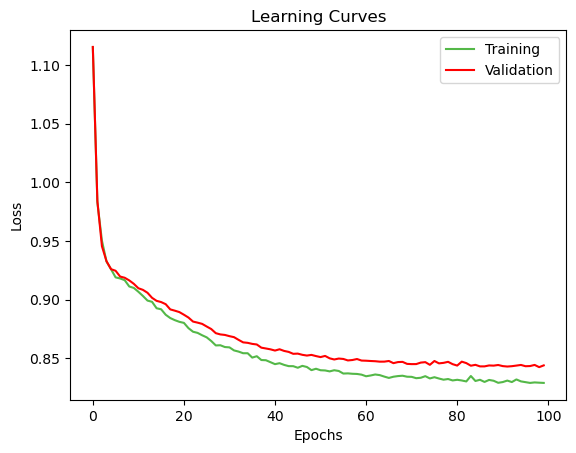

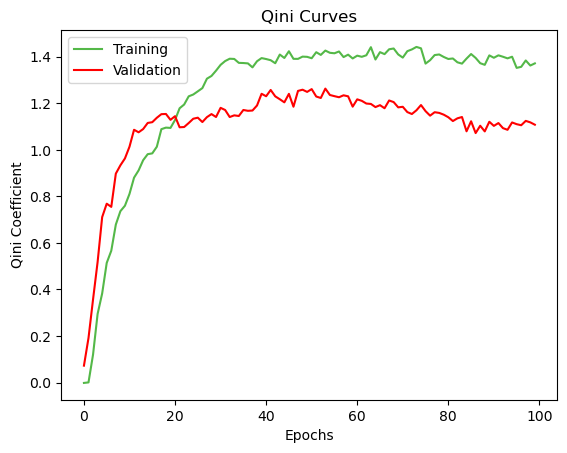

In [7]:
uplift.fit(X_train, T_train, Y_train, val_size=0.3)  # You can control the proportion of obs to use for validation   

#### Predict and visualize

In [8]:
# Uncomment the following if you want to load the "best" model based on the Qini coefficient obtained in the validation set
# Needs the arg save_model to be set to True
# import torch
# uplift.load_state_dict(torch.load("runs/Models/_twincausal/..."))  # Change the path accordingly

In [8]:
pred_our_loss = uplift.predict(X_test)

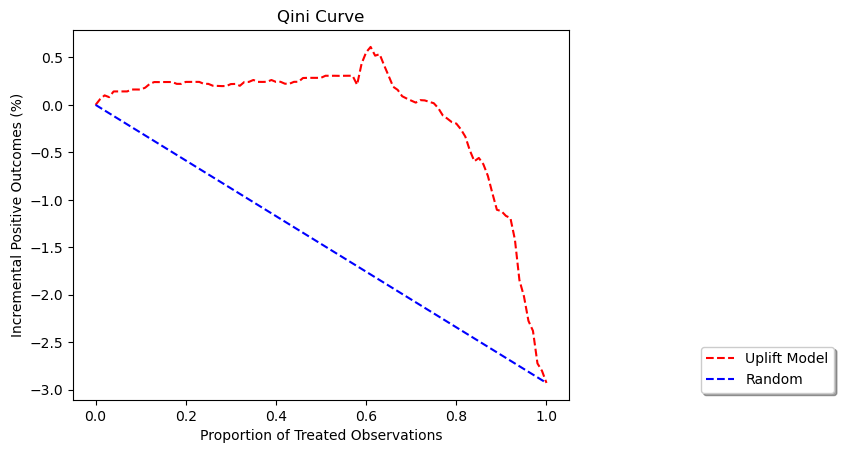

The Qini coefficient is: 1.376088878259928


In [9]:
_, q = qini_curve(T_test, Y_test, pred_our_loss)
print('The Qini coefficient is:', q)

#### Fit and compare models with no hidden layers and different losses

In [11]:
# Change nb_hlayers to 0 and regularization to L2; keep default hyper-parameters

In [10]:
twin = twin_causal(nb_features=input_size, nb_hlayers=0, reg_type=2)

input_size               201         
nb_hlayers               0           
nb_neurons               0           
lrelu_slope              0           
batch_size               256         
shuffle                  True        
epochs                   100         
learningRate             0.005000    
reg_type                 2           
l_reg_constant           0.001000    
prune                    False       
gpl_reg_constant         0           
seed                     1234        
learningCurves           True        
save_model               False       
verbose                  False       
logs                     True        
active_nb_nodes          0           
Percent: [####################] 99.0% 99999999999%  

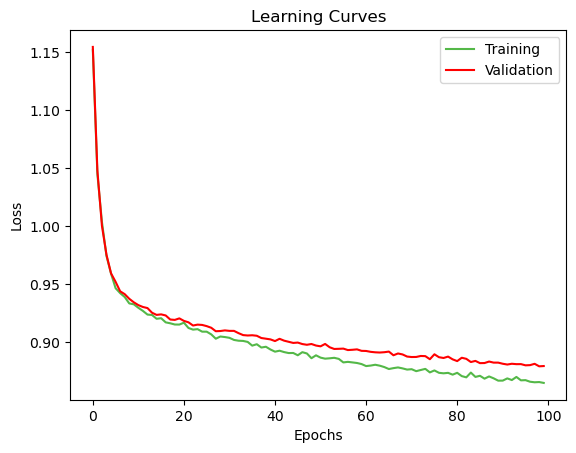

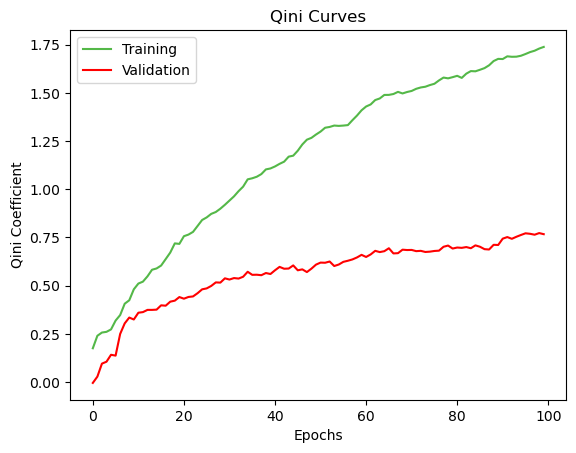

In [11]:
twin.fit(X_train, T_train, Y_train)   

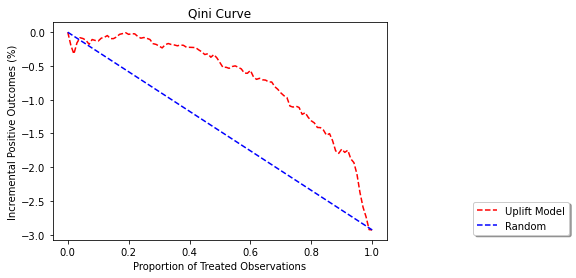

The Qini coefficient using the uplift loss is: 0.7805446928059725


In [14]:
pred_twin_loss = twin.predict(X_test)
_, q = qini_curve(T_test, Y_test, pred_twin_loss)
print('The Qini coefficient using the uplift loss is:', q)

In [15]:
# Now change the loss type to use the usual binary cross entropy (or logistic_loss)

input_size               201         
nb_hlayers               0           
nb_neurons               0           
lrelu_slope              0           
batch_size               256         
shuffle                  True        
epochs                   100         
learningRate             0.005000    
reg_type                 2           
l_reg_constant           0.001000    
prune                    False       
gpl_reg_constant         0           
seed                     1234        
learningCurves           True        
save_model               False       
verbose                  False       
logs                     True        
active_nb_nodes          0           
Percent: [####################] 99.0% 99999999999%  

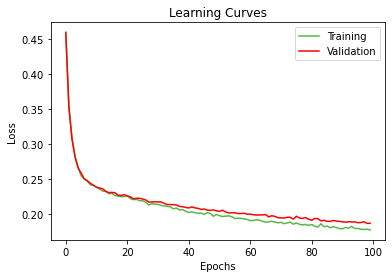

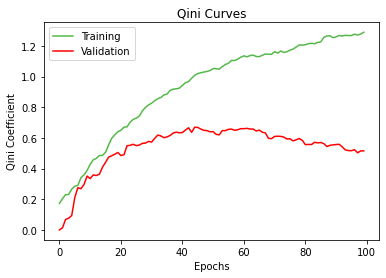

In [16]:
logistic = twin_causal(nb_features=input_size, nb_hlayers=0, reg_type=2, loss="logistic_loss")
logistic.fit(X_train, T_train, Y_train)   

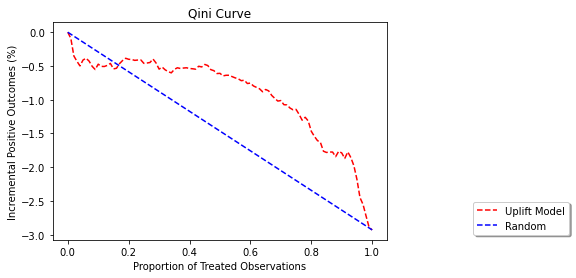

The Qini coefficient using the logistic loss is: 0.5612106979362986


In [17]:
pred_log_loss = logistic.predict(X_test)
_, q = qini_curve(T_test, Y_test, pred_log_loss)
print('The Qini coefficient using the logistic loss is:', q)